In [ ]:
# Copyright 2024 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Using Gemini Function Calling to Get Real-Time Company News and Insights

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/gemini/function-calling/use_case_company_news_and_insights.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo"><br> Open in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fgenerative-ai%2Fmain%2Fgemini%2Ffunction_calling%2Fuse_case_company_news_and_insights.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Open in Colab Enterprise
    </a>
  </td>    
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/gemini/function-calling/use_case_company_news_and_insights.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo"><br> Open in Workbench
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/function-calling/use_case_company_news_and_insights.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>

| | |
|-|-|
| Author(s) | [Ishana Shinde](https://github.com/ishana7), [Kristopher Overholt](https://github.com/koverholt) |

## Function Calling in Gemini

Gemini is a family of generative AI models developed by Google DeepMind that is designed for multimodal use cases. [Function Calling in Gemini](https://cloud.google.com/vertex-ai/generative-ai/docs/multimodal/function-calling) lets developers create a description of a function in their code, then pass that description to a language model in a request. The response from the model includes the name of a function that matches the description and the arguments to call it with.

## Overview

Meet Jane. She's a busy investor who's always on the lookout for the latest market trends and financial news. She needs information quickly and accurately, but sifting through endless articles and reports is time-consuming.

Jane discovers [Function Calling](https://cloud.google.com/vertex-ai/generative-ai/docs/multimodal/function-calling), which is a powerful tool that uses the Gemini model to predict function calls to external systems and synthesizes information in natural language. Now Jane can get instant insights on companies and breaking news, all within her familiar coding environment. She can even build a web app on top of these APIs and functions so that her coworkers can benefit from this approach without writing any code!

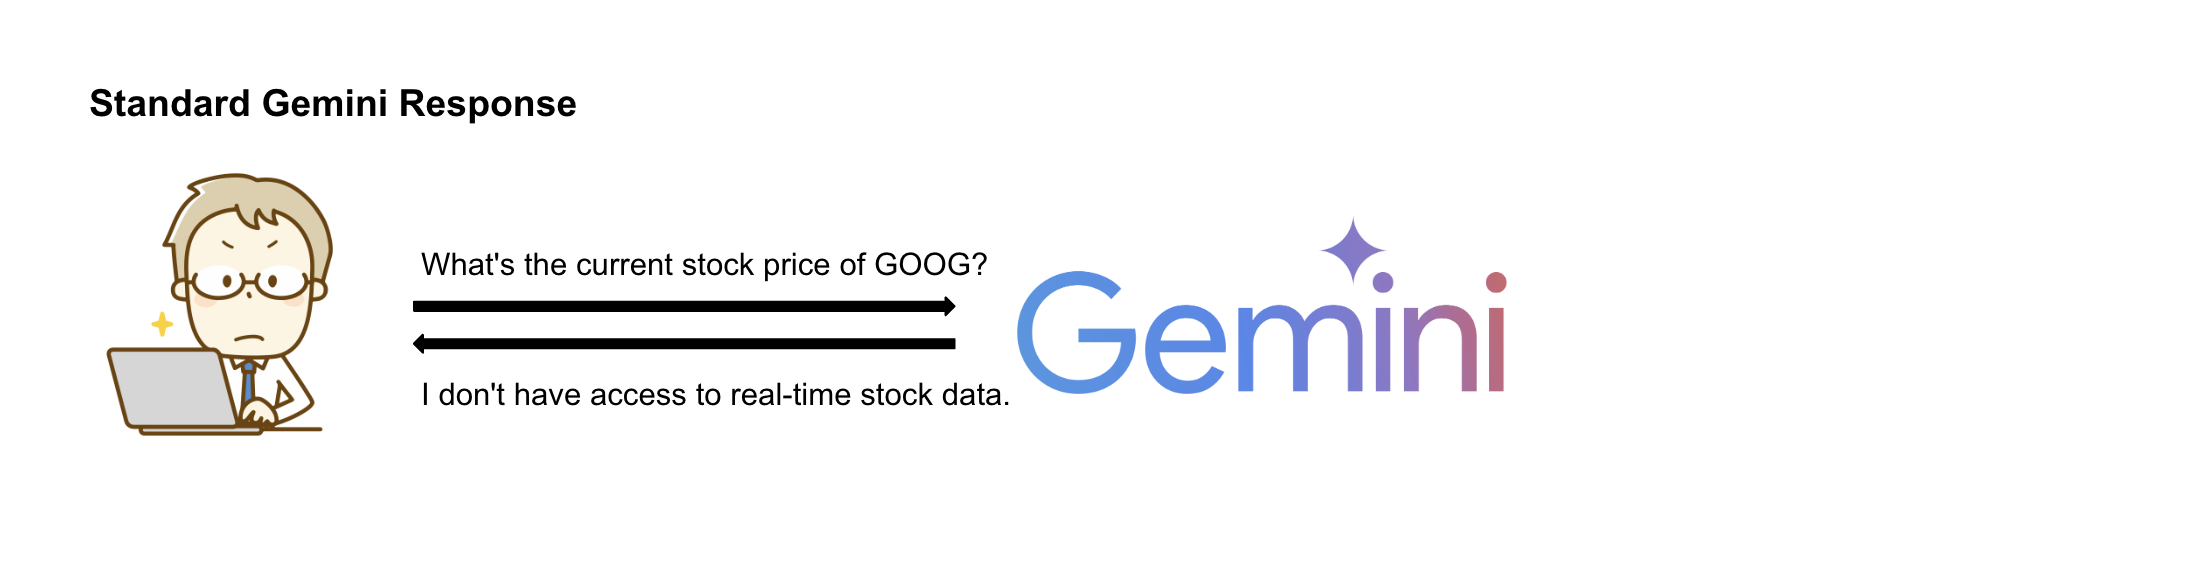

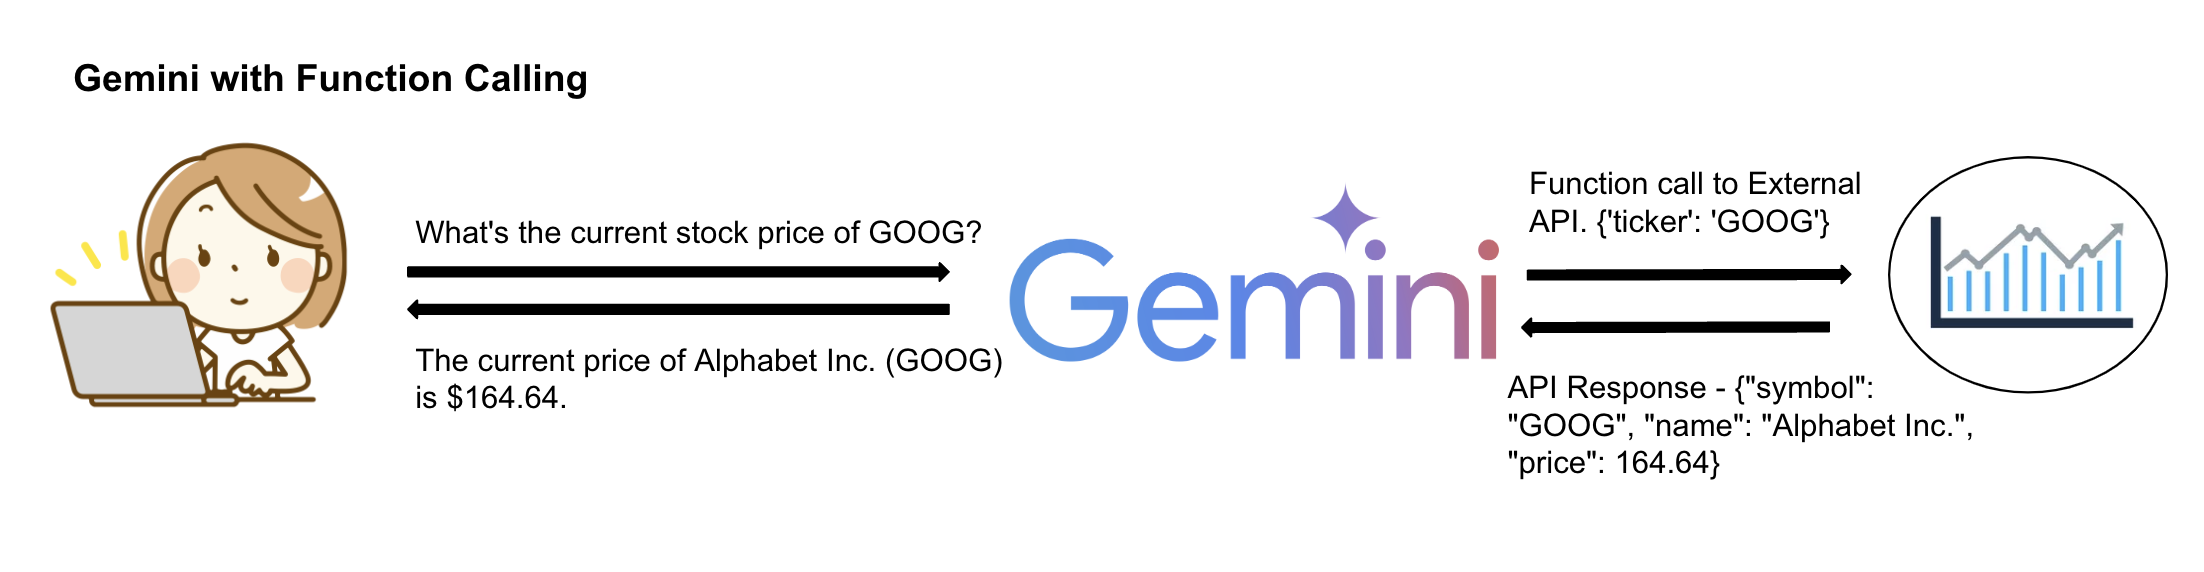

Here's how Jane plans to interact with Gemini Function Calling to help her learn about stock prices, company profiles, and news about topics and trends that she's researching:

### Financial Analysis

- Jane wants to know about Google's current financial standing. She prompts Gemini to "Give me a company overview of Google."
- Behind the scenes, the application sends a request to an external API and retrieves comprehensive information about Google.
- Gemini processes this data and presents Jane with a concise summary, highlighting key metrics and financial ratios.
- Jane could also request a stock price with a simple prompt like "Give me the current stock price for GOOG."
    
### News Insights

- Jane wants to stay informed about the latest developments in AI. She prompts Gemini with "What is the latest news on AI?"
- The application sends a request to a news API and collects relevant news articles from reliable sources.
- Gemini analyzes the news and responds to Jane with a curated summary of the top headlines and key takeaways.

This notebook demonstrates how Jane uses Function Calling in Gemini to interact with financial and news APIs to help her learn information about companies.

### Benefits of Function Calling

- **Native framework**: Function Calling is a native framework in Gemini, so there's no need to enable additional APIs or install extra packages.
- **Time savings**: No need to write custom code to call, parse, and synthesize information from multiple APIs.
- **Simplified interaction with generative AI models**: Gemini handles the complex task of understanding the user's intent, predicting function calls, extracting relevant function parameters, and generating natural language summaries.
- **Versatility**: Easily extend capabilities by adding more function calls for different APIs and tailoring it to your needs.

## Objectives

In this tutorial, you will learn how to use the Vertex AI SDK for Python to work with financial and news APIs using the Gemini model and Function Calling.

You will complete the following tasks:

- Install the Vertex AI SDK for Python
- Define functions to get company news, financial information, stock prices, and sentiment of company news
- Initialize a chat session with the Gemini API
- Write a helper function to handle function calls, API calls, and responses to the Gemini model
- Ask questions about different aspects of companies and topics

## Getting Started

### Install Vertex AI SDK and other required packages

In [1]:
!pip install --upgrade --quiet google-cloud-aiplatform requests

### Restart runtime

To use the newly installed packages in this Jupyter runtime, you must restart the runtime. You can do this by running the cell below, which restarts the current kernel.

The restart might take a minute or longer. After it's restarted, continue to the next step.

In [2]:
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

<div class="alert alert-block alert-warning">
<b>⚠️ The kernel is going to restart. Please wait until it is finished before continuing to the next step. ⚠️</b>
</div>

### Authenticate your notebook environment (Colab only)

If you are running this notebook on Google Colab, run the cell below to authenticate your environment.

In [3]:
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

### Set Google Cloud project information and initialize Vertex AI SDK

To get started using Vertex AI, you must have an existing Google Cloud project and [enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com).

Learn more about [setting up a project and a development environment](https://cloud.google.com/vertex-ai/docs/start/cloud-environment).

In [1]:
PROJECT_ID = "[your-project-id]"  # @param {type:"string"}
LOCATION = "us-central1"  # @param {type:"string"}

import vertexai

vertexai.init(project=PROJECT_ID, location=LOCATION)

### Import libraries

In [2]:
import requests
from IPython.display import display, Markdown
from vertexai.generative_models import (
    FunctionDeclaration,
    GenerativeModel,
    GenerationConfig,
    Part,
    Tool,
)

## Building an assistant to answer financial and news questions about companies

With the initial setup complete, you're ready to build your application that uses the Gemini model, functions as tools, and API calls to explore financial and news information related to various companies and industries.

Before we go through the following code examples, it's helpful to understand a conceptual model of the development journey that you're about to go on with Gemini Function Calling. The following diagram shows key steps that you'll follow along the way:

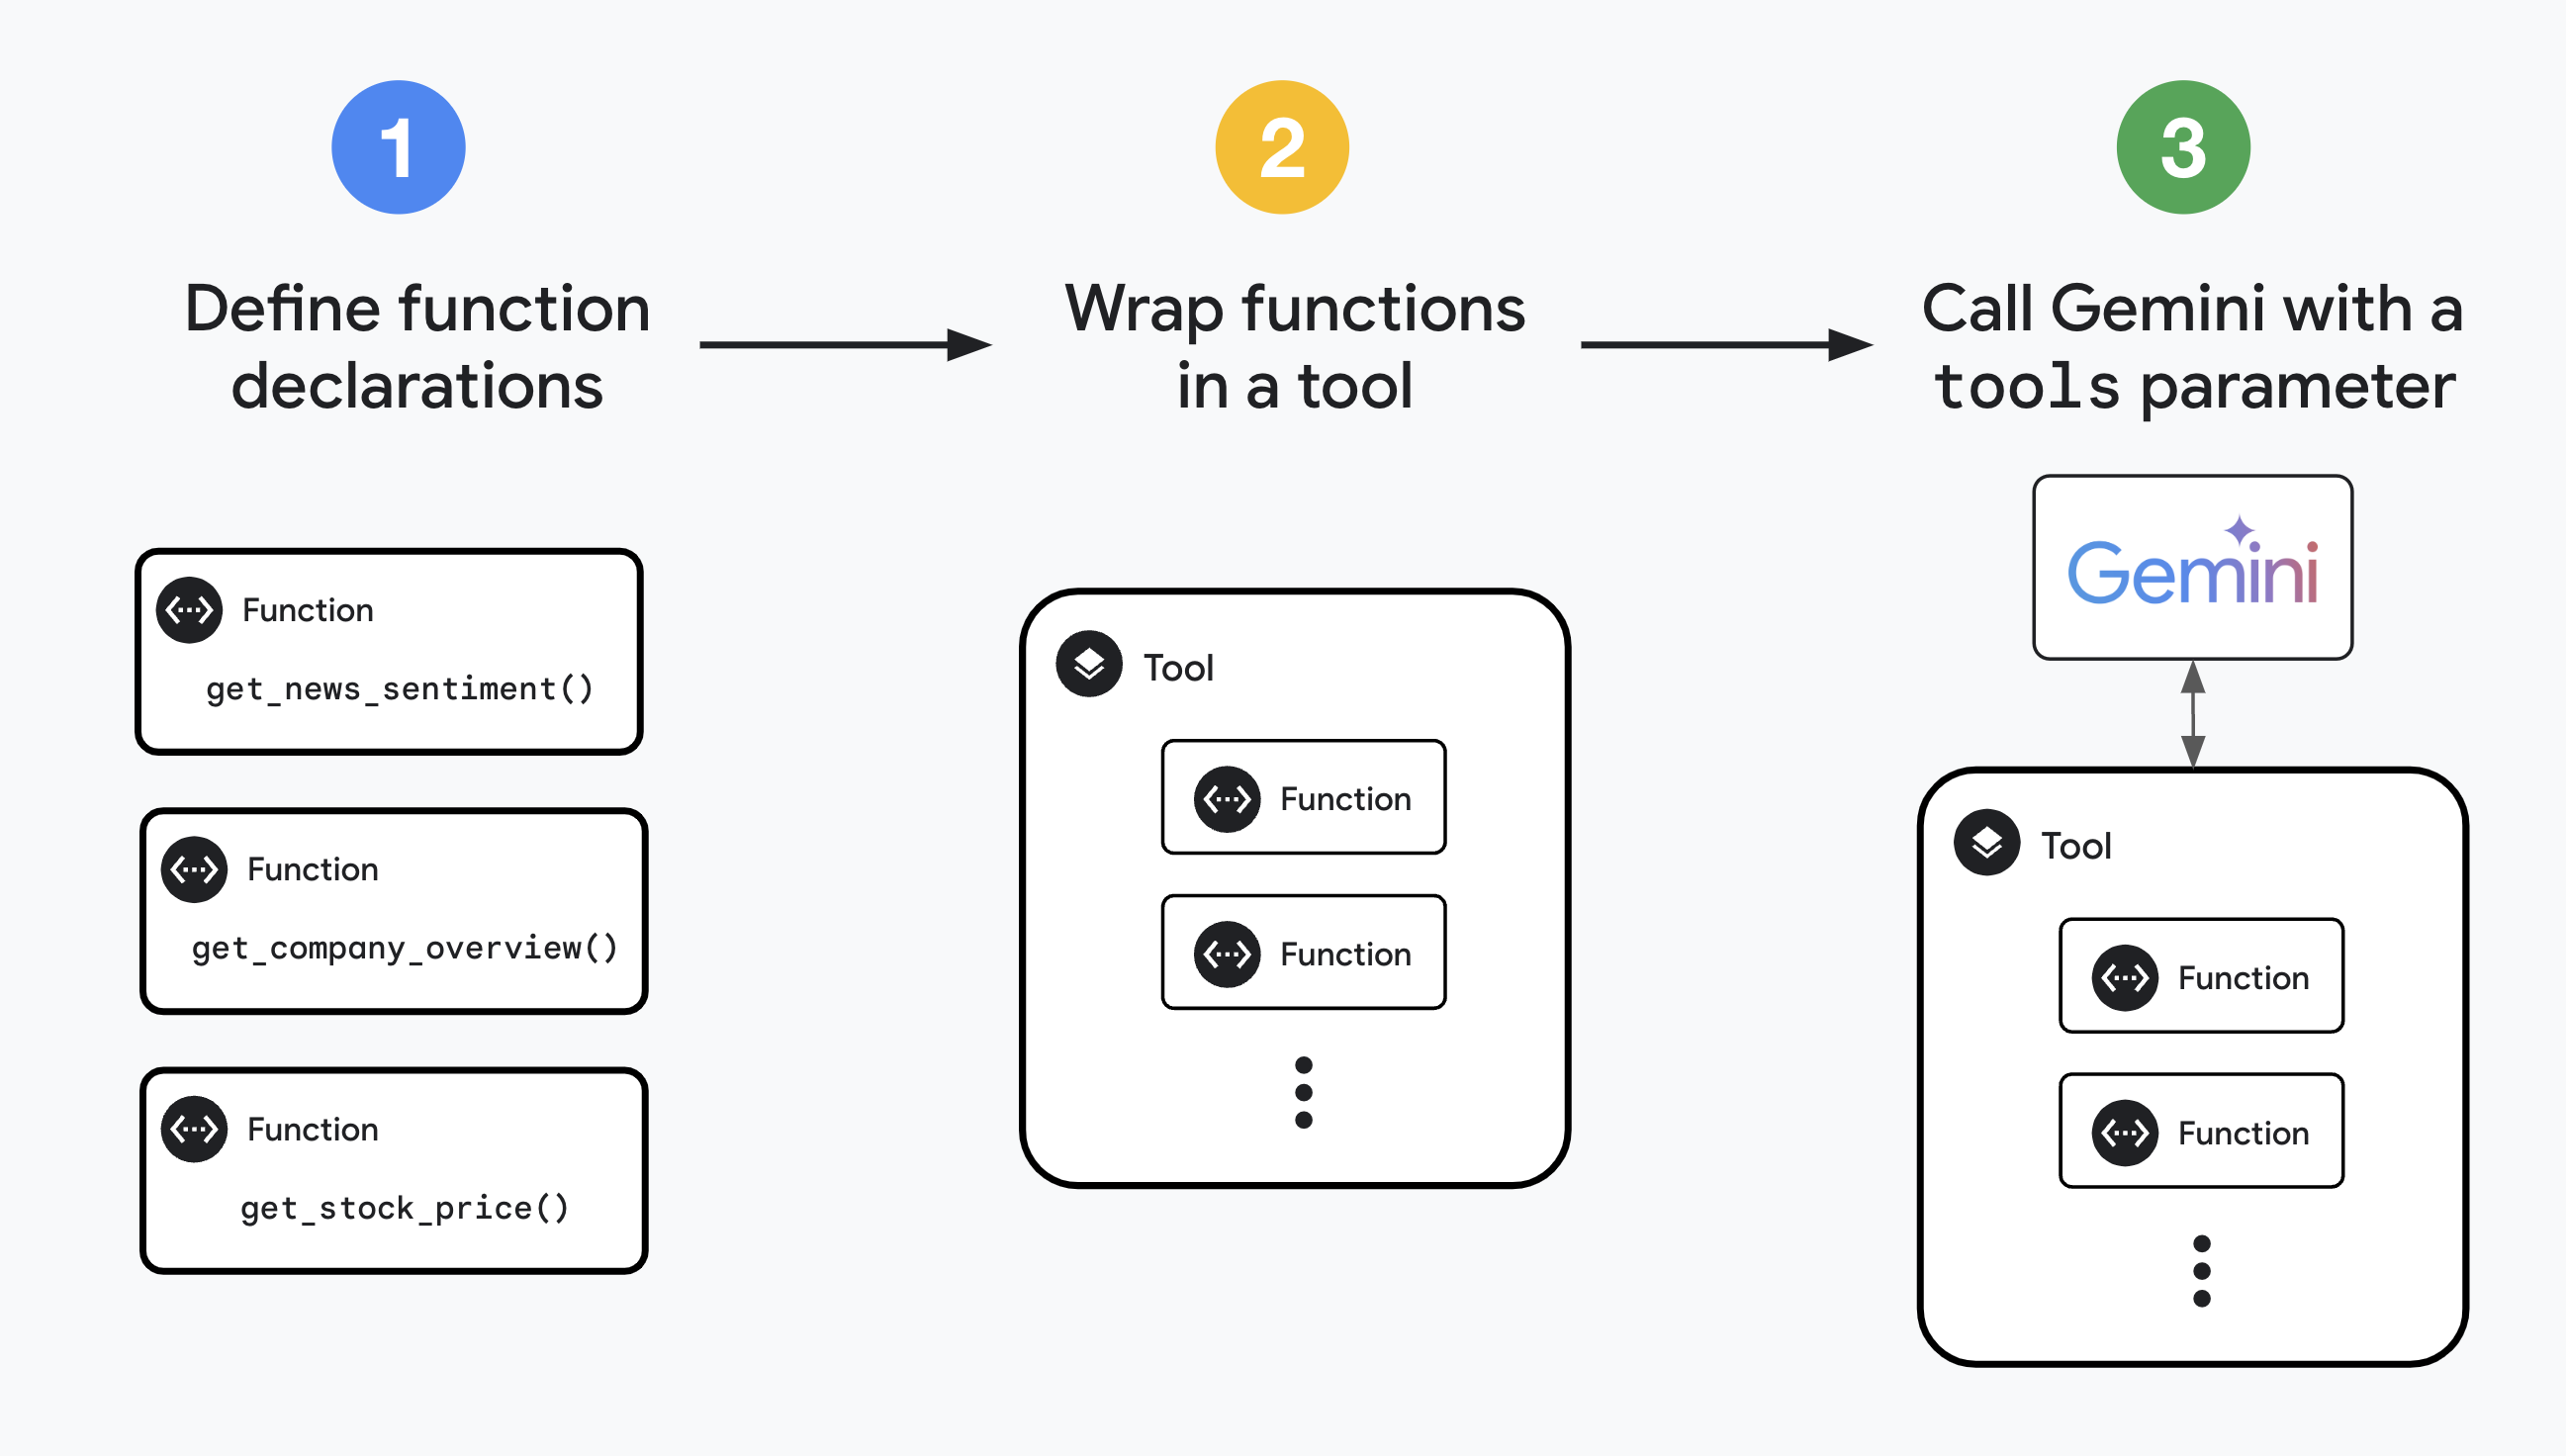

### Define functions and parameter descriptions

Define function declarations that will be used as tools for Gemini by specifying the function details as a dictionary in accordance with the [OpenAPI JSON schema](https://spec.openapis.org/oas/v3.0.3#schemawr).

You'll define four tools to fetch various company and financial information, including stock prices, company overviews, news for a given company, and news sentiment for a given topic:

In [3]:
get_stock_price = FunctionDeclaration(
    name="get_stock_price",
    description="Fetch the current stock price of a given company",
    parameters={
        "type": "object",
        "properties": {
            "ticker": {
                "type": "string",
                "description": "Stock ticker symbol for a company",
            }
        },
    },
)

get_company_overview = FunctionDeclaration(
    name="get_company_overview",
    description="Get company details and other financial data",
    parameters={
        "type": "object",
        "properties": {
            "ticker": {
                "type": "string",
                "description": "Stock ticker symbol for a company",
            }
        },
    },
)

get_company_news = FunctionDeclaration(
    name="get_company_news",
    description="Get the latest news headlines for a given company.",
    parameters={
        "type": "object",
        "properties": {
            "tickers": {
                "type": "string",
                "description": "Stock ticker symbol for a company",
            }
        },
    },
)

get_news_with_sentiment = FunctionDeclaration(
    name="get_news_with_sentiment",
    description="Gets live and historical market news and sentiment data",
    parameters={
        "type": "object",
        "properties": {
            "news_topic": {
                "type": "string",
                "description": """News topic to learn about. Supported topics
                               include blockchain, earnings, ipo,
                               mergers_and_acquisitions, financial_markets,
                               economy_fiscal, economy_monetary, economy_macro,
                               energy_transportation, finance, life_sciences,
                               manufacturing, real_estate, retail_wholesale,
                               and technology""",
            },
        },
    },
)

### Wrap function declarations in a tool

Now, you can define a tool that will allow Gemini to select from the set of functions we've defined:

In [4]:
company_insights_tool = Tool(
    function_declarations=[
        get_stock_price,
        get_company_overview,
        get_company_news,
        get_news_with_sentiment,
    ],
)

### Company and financial information API

Alpha Vantage provides real-time and historical financial market data through a set of data APIs. In this tutorial, you'll use the Alpha Vantage API to get stock prices, company information, and news about different industries.

You can register for a free developer API key at [Alpha Vantage](https://www.alphavantage.co/). Once you have an API key, paste it into the cell below:

In [5]:
# API key for company and financial information
API_KEY = "PASTE_YOUR_API_KEY_HERE"

You'll use this API key throughout the rest of this notebook to make API requests and get information about various companies and industries.

### Define Python functions and a function handler

Define Python functions that you'll invoke to fetch data from an external API:

In [6]:
def get_stock_price_from_api(content):
    url = f"https://www.alphavantage.co/query?function=GLOBAL_QUOTE&symbol={content['ticker']}&apikey={API_KEY}"
    api_request = requests.get(url)
    return api_request.text


def get_company_overview_from_api(content):
    url = f"https://www.alphavantage.co/query?function=OVERVIEW&symbol={content['ticker']}&apikey={API_KEY}"
    api_response = requests.get(url)
    return api_response.text


def get_company_news_from_api(content):
    url = f"https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers={content['tickers']}&limit=20&sort=RELEVANCE&apikey={API_KEY}"
    api_response = requests.get(url)
    return api_response.text


def get_news_with_sentiment_from_api(content):
    url = f"https://www.alphavantage.co/query?function=NEWS_SENTIMENT&topics={content['news_topic']}&limit=20&sort=RELEVANCE&apikey={API_KEY}"
    api_request = requests.get(url)
    return api_request.text

Define a function handler that maps function call names (from your function declarations) to actual Python functions that call APIs:

In [7]:
function_handler = {
    "get_stock_price": get_stock_price_from_api,
    "get_company_overview": get_company_overview_from_api,
    "get_company_news": get_company_news_from_api,
    "get_news_with_sentiment": get_news_with_sentiment_from_api,
}

### Initialize model

Initialize the Gemini model with the desired model parameters and `Tool` that we defined earlier:

In [8]:
gemini_model = GenerativeModel(
    "gemini-1.5-pro-001",
    generation_config=GenerationConfig(temperature=0),
    tools=[company_insights_tool],
)

### Initialize chat session

In [9]:
chat = gemini_model.start_chat()

### Define a helper function to send chat messages and handle function calls & responses

Before you start chatting with the Gemini model and making function calls, recall that Gemini Function Calling predicts a function call from a set of functions then returns structured information about which function to call and which parameters to use.

The following diagram shows the data flow and step-by-step process that occurs with Gemini Function Calling for a given conversation turn (i.e., a single input prompt from the user and output summary to the user):

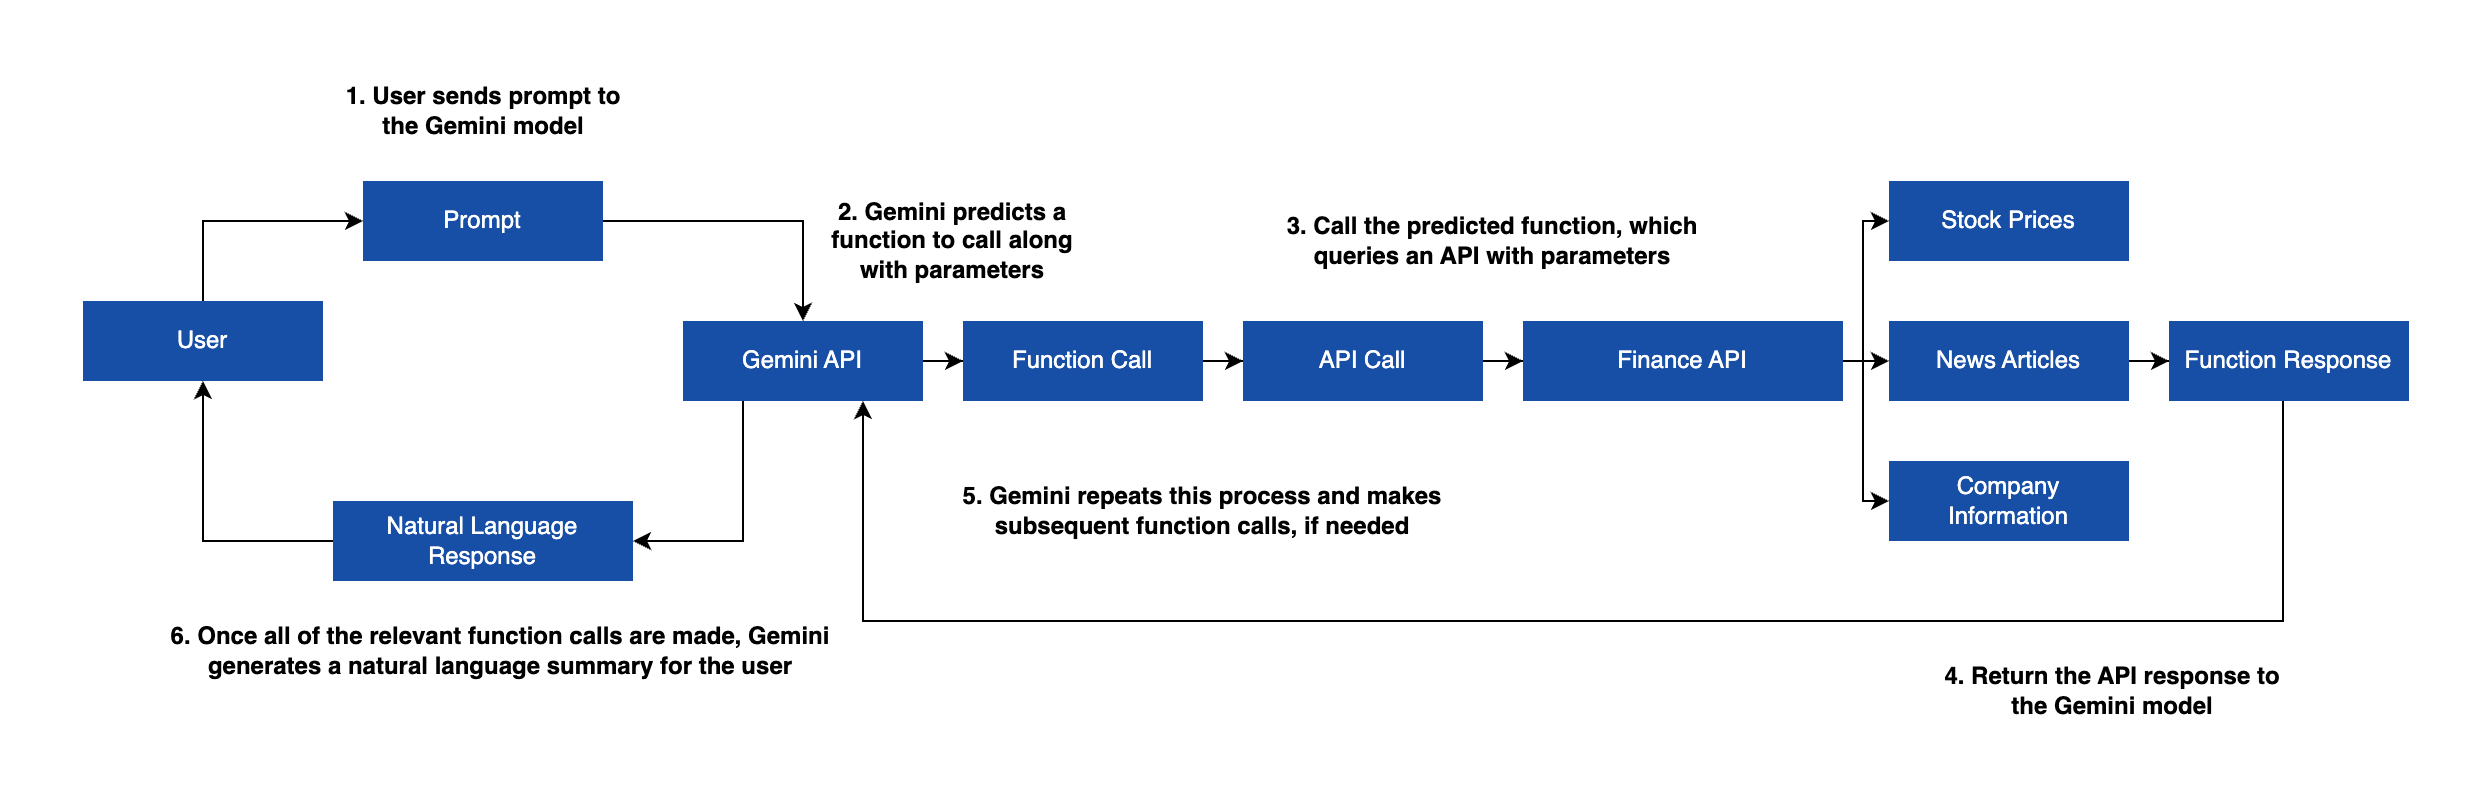

Rather than having to manually inspect the predicted function names and function parameters and then repeatedly invoking API calls, the following helper function automates the process of handling API calls and responses to and from the Gemini model:

In [10]:
def send_chat_message(prompt):
    display(Markdown("#### Prompt"))
    print(prompt, "\n")
    prompt += """
    Give a concise, high-level summary. Only use information that you learn from 
    the API responses. 
    """

    # Send a chat message to the Gemini API
    response = chat.send_message(prompt)

    # Handle cases with multiple chained function calls
    function_calling_in_process = True
    while function_calling_in_process:
        # Extract the function call response
        function_call = response.candidates[0].content.parts[0].function_call

        # Check for a function call or a natural language response
        if function_call.name in function_handler.keys():
            # Extract the function call name
            function_name = function_call.name
            display(Markdown("#### Predicted function name"))
            print(function_name, "\n")

            # Extract the function call parameters
            params = {key: value for key, value in function_call.args.items()}
            display(Markdown("#### Predicted function parameters"))
            print(params, "\n")

            # Invoke a function that calls an external API
            function_api_response = function_handler[function_name](params)[
                :20000
            ]  # Stay within the input token limit
            display(Markdown("#### API response"))
            print(function_api_response[:500], "...", "\n")

            # Send the API response back to Gemini, which will generate a natural language summary or another function call
            response = chat.send_message(
                Part.from_function_response(
                    name=function_name,
                    response={"content": function_api_response},
                ),
            )
        else:
            function_calling_in_process = False

    # Show the final natural language summary
    display(Markdown("#### Natural language response"))
    display(Markdown(response.text.replace("$", "\\\$")))

In the above helper function, the `while` loop handles cases in which the Gemini model predicts two or more chained Function Calls. The code within the `if` statement handles the invocation of function calls and API requests and responses. And the line of code in the `else` statement stops the Function Calling logic in the event that Gemini generates a natural language summary.

### Ask questions about various companies and topics

Now that you've defined your functions, initialized the Gemini model, and started a chat session, you're ready to ask questions!

### Sample prompt related to stock price

Start with a simple prompt that asks about a stock price:

In [11]:
send_chat_message("What is the current stock price for Google?")

#### Prompt

What is the current stock price for Google? 



#### Predicted function name

get_stock_price 



#### Predicted function parameters

{'ticker': 'GOOG'} 



#### API response

{
    "Global Quote": {
        "01. symbol": "GOOG",
        "02. open": "166.6700",
        "03. high": "168.5300",
        "04. low": "165.6900",
        "05. price": "168.4600",
        "06. volume": "17041119",
        "07. latest trading day": "2024-05-02",
        "08. previous close": "165.5700",
        "09. change": "2.8900",
        "10. change percent": "1.7455%"
    }
} ... 



#### Natural language response

The current stock price for Google (GOOG) is \\$168.46 as of May 2, 2024. This represents a 1.75% increase from the previous close of \\$165.57.

#### How it works

Nice work! The output includes a concise summary of the real-time stock price for Alphabet, Inc.

Let's walk through the step-by-step end process that your application code went through, from the input prompt to the output summary:

1. Gemini used information within your prompt and predicted the `get_stock_price()` function along with the ticker symbol `GOOG`.
1. Your helper function then invoked an API call to retrieve the latest stock ticker information about Alphabet Inc.
1. Once you returned the API response to Gemini, it used this information to generate a natural language summary with the stock price of Alphabet Inc.

### Sample prompt related to company information

In [12]:
send_chat_message("Give me a company overview of Google")

#### Prompt

Give me a company overview of Google 



#### Predicted function name

get_company_overview 



#### Predicted function parameters

{'ticker': 'GOOG'} 



#### API response

{
    "Symbol": "GOOG",
    "AssetType": "Common Stock",
    "Name": "Alphabet Inc Class C",
    "Description": "Alphabet Inc. is an American multinational conglomerate headquartered in Mountain View, California. It was created through a restructuring of Google on October 2, 2015, and became the parent company of Google and several former Google subsidiaries. The two co-founders of Google remained as controlling shareholders, board members, and employees at Alphabet. Alphabet is the world's four ... 



#### Natural language response

**Company Overview of Google (GOOG)**

**Name:** Alphabet Inc. Class C

**Description:** Alphabet Inc. is an American multinational conglomerate headquartered in Mountain View, California. It was created through a restructuring of Google on October 2, 2015, and became the parent company of Google and several former Google subsidiaries. The two co-founders of Google remained as controlling shareholders, board members, and employees at Alphabet. Alphabet is the world's fourth-largest technology company by revenue and one of the world's most valuable companies.

**Sector:** Technology

**Industry:** Services-Computer Programming, Data Processing, etc.

**Market Capitalization:** \\$2069.97 billion

**Trailing P/E:** 25.84

**Forward P/E:** 23.42

**52-Week High:** \\$176.42

**52-Week Low:** \\$105.79

#### How it works

For this prompt, Gemini predicted the `get_company_overview()` function along with the ticker symbol `GOOG`. The logic within your helper function handled the API call, and the natural language response generated by Gemini includes information about financial metrics, a company description, and stock details.

### Sample prompt for information about multiple companies

Now, see what happens what you ask about two different companies:

In [13]:
send_chat_message("Give me a company overview of Walmart and The Home Depot")

#### Prompt

Give me a company overview of Walmart and The Home Depot 



#### Predicted function name

get_company_overview 



#### Predicted function parameters

{'ticker': 'WMT'} 



#### API response

{
    "Symbol": "WMT",
    "AssetType": "Common Stock",
    "Name": "Walmart Inc",
    "Description": "Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores from the United States, headquartered in Bentonville, Arkansas. It also owns and operates Sam's Club retail warehouses.",
    "CIK": "104169",
    "Exchange": "NYSE",
    "Currency": "USD",
    "Country": "USA",
    "Sector": "TRADE & SERVICES",
     ... 



#### Predicted function name

get_company_overview 



#### Predicted function parameters

{'ticker': 'HD'} 



#### API response

{
    "Symbol": "HD",
    "AssetType": "Common Stock",
    "Name": "Home Depot Inc",
    "Description": "The Home Depot, Inc., commonly known as Home Depot, is the largest home improvement retailer in the United States, supplying tools, construction products, and services. The company is headquartered in incorporated Cobb County, Georgia, with an Atlanta mailing address.",
    "CIK": "354950",
    "Exchange": "NYSE",
    "Currency": "USD",
    "Country": "USA",
    "Sector": "TRADE & SERVICES",
 ... 



#### Natural language response

**Company Overview of Walmart (WMT)**

**Name:** Walmart Inc.

**Description:** Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores from the United States, headquartered in Bentonville, Arkansas. It also owns and operates Sam's Club retail warehouses.

**Sector:** Trade & Services

**Industry:** Retail-Variety Stores

**Market Capitalization:** \\$481.25 billion

**Trailing P/E:** 31.26

**Forward P/E:** 25.13

**52-Week High:** \\$61.66

**52-Week Low:** \\$47.82

**Company Overview of The Home Depot (HD)**

**Name:** Home Depot Inc.

**Description:** The Home Depot, Inc., commonly known as Home Depot, is the largest home improvement retailer in the United States, supplying tools, construction products, and services. The company is headquartered in incorporated Cobb County, Georgia, with an Atlanta mailing address.

**Sector:** Trade & Services

**Industry:** Retail-Lumber & Other Building Materials Dealers

**Market Capitalization:** \\$329.35 billion

**Trailing P/E:** 22.01

**Forward P/E:** 22.42

**52-Week High:** \\$396.87

**52-Week Low:** \\$269.93

#### How it works

Great! This time, Gemini predicted the use of two subsequent function calls to `get_company_overview()`, one for each ticker symbol. The logic within your helper function handled the chained function calls, and the natural language response generated by Gemini includes information about both companies.

### Sample prompt related to company news

Ask a question about the latest news related to a particular company:

In [14]:
send_chat_message("What's the latest news about Google?")

#### Prompt

What's the latest news about Google? 



#### Predicted function name

get_company_news 



#### Predicted function parameters

{'tickers': 'GOOG'} 



#### API response

{
    "items": "50",
    "sentiment_score_definition": "x <= -0.35: Bearish; -0.35 < x <= -0.15: Somewhat-Bearish; -0.15 < x < 0.15: Neutral; 0.15 <= x < 0.35: Somewhat_Bullish; x >= 0.35: Bullish",
    "relevance_score_definition": "0 < x <= 1, with a higher score indicating higher relevance.",
    "feed": [
        {
            "title": "Google to political ads using AI: Be 'clear' about any digitally-created content",
            "url": "https://www.marketwatch.com/story/google-to-political- ... 



#### Natural language response

**Latest News about Google (GOOG)**

**Title:** Google to political ads using AI: Be 'clear' about any digitally-created content

**Source:** MarketWatch

**Summary:** Google and YouTube's new policy updates say that using AI to change voices or images in political ads must have a prominent disclosure on the ad itself.

**Overall Sentiment:** Somewhat-Bullish

#### How it works

For this prompt, Gemini predicted the `get_company_news()` function. The logic within your helper function handled the API call, and the natural language response generated by Gemini includes the latest news related to Google.

### Sample prompt related to industry news

Now, try sending a prompt about news for a particular industry:

In [15]:
send_chat_message("Has there been any exciting news related to real estate recently?")

#### Prompt

Has there been any exciting news related to real estate recently? 



#### Predicted function name

get_news_with_sentiment 



#### Predicted function parameters

{'news_topic': 'real_estate'} 



#### API response

{
    "items": "50",
    "sentiment_score_definition": "x <= -0.35: Bearish; -0.35 < x <= -0.15: Somewhat-Bearish; -0.15 < x < 0.15: Neutral; 0.15 <= x < 0.35: Somewhat_Bullish; x >= 0.35: Bullish",
    "relevance_score_definition": "0 < x <= 1, with a higher score indicating higher relevance.",
    "feed": [
        {
            "title": "ROSEN, A HIGHLY RECOGNIZED LAW FIRM, Encourages SSR Mining Inc. Investors to Secure Counsel Before Important Deadline in Securities Class Action First Filed  ... 



#### Natural language response

**Title:** Will Soft Data Center Revenues Mar Intel (INTC) Q1 Earnings?

**Source:** Zacks Commentary

**Summary:** Intel (INTC) is likely to have recorded lower revenues from the Datacenter and AI Group (DCAI) segment in first-quarter 2024, owing to the challenging macroeconomic environment.

**Overall Sentiment:** Somewhat-Bullish

#### How it works

This time, Gemini predicted the `get_news_with_sentiment()` function along with the function parameter `real_estate` as defined in your `FunctionDeclaration`. The logic within your helper function handled the API call, and the natural language response generated by Gemini includes the latest news and sentiment in the real estate industry.

### Summary

This tutorial highlights how Gemini Function Calling helps bridge the gap between raw data and actionable insights. This functionality empowers users to ask questions in natural language, our application code makes API calls to retrieve the latest relevant information, then the Gemini model summarizes the results from one or more API calls.

We're excited to see how you'll use Gemini Function calling to build generative AI applications that can help users make informed decisions, whether they are investors like Jane, or anyone who's looking to combine the power of generative AI models with reliable and up-to-date information from external data sources.

Feel free to try sending additional prompts, editing the function declarations, or even adding your own. Happy Function Calling!